In [1]:
import rootpath
import sys
import os
sys.path.append(rootpath.detect())


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def image_infill(opt, front_value = 0., n_contours=20, uncertainty=0.1):
    #figure_properties
    fig = plt.figure(figsize=[8,7])
    ax = fig.gca()
    l_lims = opt.apply_weighting(np.array([[0, 0]]))
    u_lims = opt.apply_weighting(np.array([[1.5, 1.5]]))
    ax.set_xlim([0., 1.5])
    ax.set_ylim([0., 1.5])
    
    # compute infill
    M, N = 200, 200
    x = np.linspace(0., 1.5, M)
    y = np.linspace(0., 1.5, N)
    xx, yy = np.meshgrid(x, y)
    xy = np.vstack((xx.flat, yy.flat)).T
    xyw = opt.apply_weighting(xy)
    zz = np.array([opt._scalarise_y(xyi, np.ones_like(xyi)*uncertainty*opt.obj_weights, invert=False) for xyi in xyw])
    zz = zz.reshape(N,M)
    
    #image infill
    pcol = ax.pcolor(xx, yy, zz)
    levels = np.linspace(zz.min(), zz.max(), n_contours+2)[1:-1]
    ax.contour(xx, yy, zz, colors="white", levels=levels)
    if front_value is not None:
        ax.contour(xx, yy, zz, colors="C3", levels=[front_value])
        front_legend = plt.Line2D([0], [0], c="C3")
    
    # scatter samples
    ax.scatter(opt.d[:,0], opt.d[:,1], facecolors='none', edgecolors="C3", linewidth=2., label="dominated samples")
    ax.scatter(opt.p[:,0], opt.p[:,1], c="C3", label="non-dominated samples")
    fig.colorbar(pcol)
    handles, labels = ax.get_legend_handles_labels()
    if front_value is not None:
        handles.append(front_legend)
        labels.append("{}".format(front_value))
    ax.legend(handles, labels)
    
    return fig

In [4]:
seed = 1
INVERT = True
plt.rcParams['image.cmap'] = 'viridis'
target = np.array([0.3, 0.1]).reshape(1, -1)

 /tmp/ipykernel_44940/418229984.py:25: UserWarning:No contour levels were found within the data range.


Text(0, 0.5, '$f_2$')

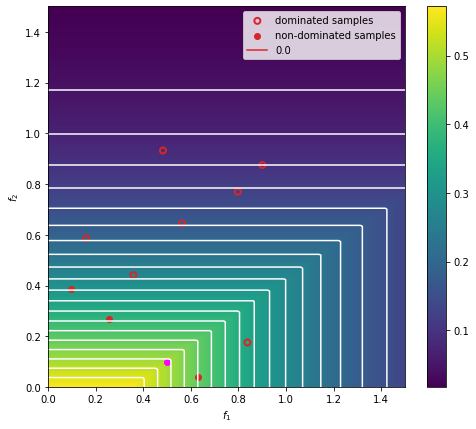

In [7]:
from testsuite.surrogates import GP, MultiSurrogate
from testsuite.directed_optimisers import DirectedSaf

saf_opt = DirectedSaf(objective_function=lambda x: x[0:2], w=0.0, targets= [[0.5, 0.1]], ei=False,  limits=[[0, 0, 0, 0, 0], [1,1,1,1,1]], surrogate=MultiSurrogate(GP), n_initial=10, seed=seed)
# saf_opt.obj_weights = np.ones_like(saf_opt.obj_weights)
fig_saf = image_infill(saf_opt)
# fig_saf.axes[0].set_title("saf: $\mu$");
fig_saf.gca().scatter(*np.array(saf_opt.targets).T, c="magenta")
fig_saf.gca().set_xlabel("$f_1$")
fig_saf.gca().set_ylabel("$f_2$")
# fig_saf.axes[0].scatter((saf_opt.y*saf_opt.obj_weights)[:,0], (saf_opt.y*saf_opt.obj_weights)[:,1], c="magenta")